In [55]:
import numpy as np
import pandas as pd
import tolka_resultatlista as tolk
import plot_skatescores as plot
import matplotlib.pyplot as pl
pl.rcParams['figure.figsize'] = (12.0, 9.0)

In [2]:
korta = tolk.tolka_ISUCalcFs_resultat("results/tabula-gpcan2018_Ladies_SP_Scores.csv",num_judges=9)
langa = tolk.tolka_ISUCalcFs_resultat("results/tabula-gpcan2018_Ladies_FS_Scores.csv",num_judges=9)
shortname="Ladies, Short Program, Skate Canada"
longname="Ladies, Long Program, Skate Canada"

In [3]:
k_pc = [el["PCS"] for el in korta]
k_el = [el["TES"] for el in korta]
k_name = [el["name"] for el in korta]
l_pc = [el["PCS"] for el in langa]
l_el = [el["TES"] for el in langa]
l_name = [el["name"] for el in langa]

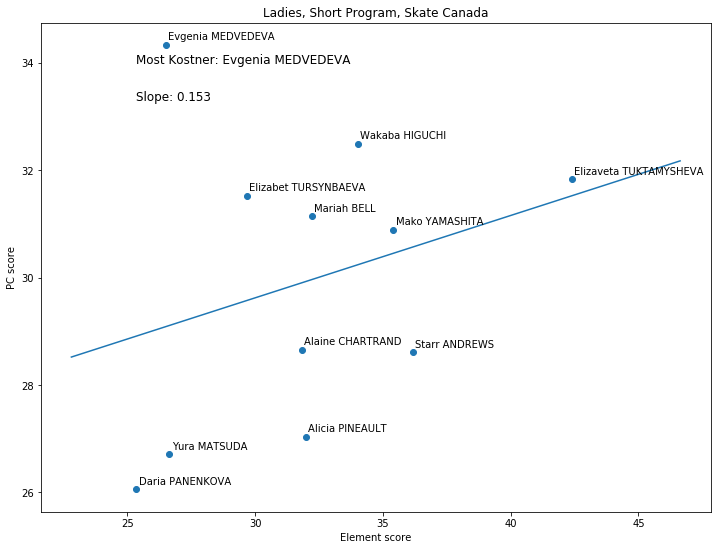

In [4]:
plot.kosttnerplot(k_name,k_el,k_pc,shortname)

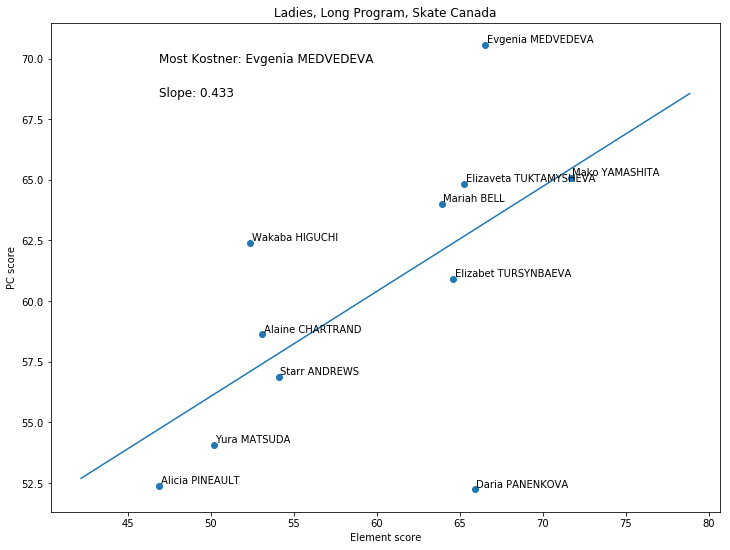

In [5]:
plot.kosttnerplot(l_name,l_el,l_pc,longname)

In [6]:
goes = []
for skater in korta:
    for elem in skater["elements"]:
        goes.append(elem["GOE"])
k_goes = np.array(goes)

goes = []
for skater in langa:
    for elem in skater["elements"]:
        goes.append(elem["GOE"])
l_goes = np.array(goes)


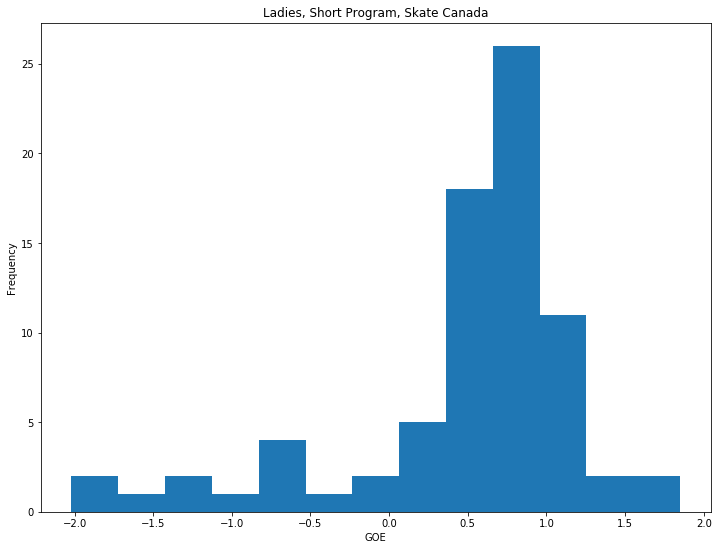

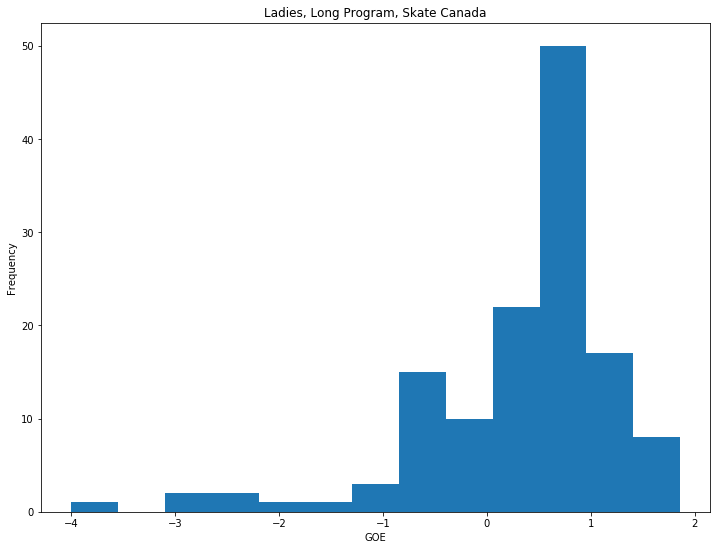

In [7]:
pl.hist(k_goes,13)
pl.title(shortname)
pl.xlabel("GOE")
pl.ylabel("Frequency")
pl.show()

pl.hist(l_goes,13)
pl.title(longname)
pl.xlabel("GOE")
pl.ylabel("Frequency")
pl.show()

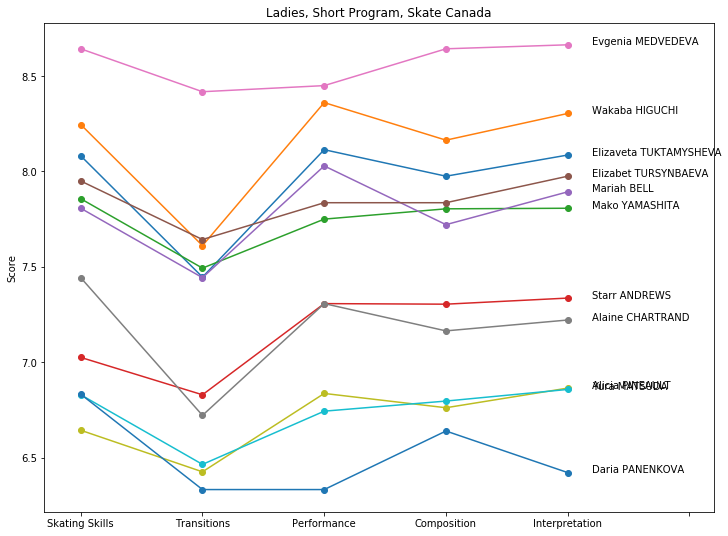

In [8]:
plot.show_pc_scores(korta,shortname)

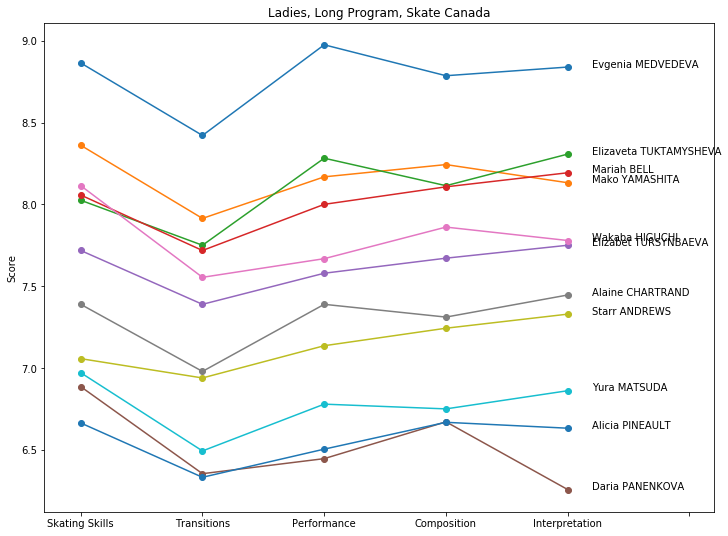

In [10]:
plot.show_pc_scores(langa,longname)

In [36]:
bases = []
for skater in korta:
    base = 0
    for elem in skater["elements"]:
        base += elem["base"]
    bases.append((skater["name"],skater["TES"]/base))

k_overBase = sorted(bases,key=lambda x : x[1],reverse=True)

for itm in k_overBase:
    print("{: <24} {:.3f}".format(*itm))

Starr ANDREWS            1.214
Elizaveta TUKTAMYSHEVA   1.198
Mako YAMASHITA           1.169
Evgenia MEDVEDEVA        1.158
Wakaba HIGUCHI           1.149
Mariah BELL              1.130
Alaine CHARTRAND         1.103
Alicia PINEAULT          1.070
Elizabet TURSYNBAEVA     1.062
Yura MATSUDA             1.042
Daria PANENKOVA          1.004


In [37]:
bases = []
for skater in langa:
    base = 0
    for elem in skater["elements"]:
        base += elem["base"]
    bases.append((skater["name"],skater["TES"]/base))

sorted(bases,key=lambda x : x[1],reverse=True)

l_overBase = sorted(bases,key=lambda x : x[1],reverse=True)
for itm in l_overBase:
    print("{: <24} {:.3f}".format(*itm))

Mako YAMASHITA           1.173
Evgenia MEDVEDEVA        1.147
Mariah BELL              1.095
Elizaveta TUKTAMYSHEVA   1.081
Alaine CHARTRAND         1.074
Elizabet TURSYNBAEVA     1.070
Yura MATSUDA             1.068
Daria PANENKOVA          1.059
Wakaba HIGUCHI           1.010
Alicia PINEAULT          1.004
Starr ANDREWS            0.978


In [57]:
kor = sorted(k_overBase,key=lambda x : x[0],reverse=True)
lon = sorted(l_overBase,key=lambda x : x[0],reverse=True)
overbase = np.zeros((len(dd),2))
names = []
for i,el in enumerate(kor):
    overbase[i,:] = np.array([kor[i][1],lon[i][1]])
    names.append(el[0])

This attempt at a bump chart was pretty bad, try getting this library at some later point instead:
https://github.com/pascal-schetelat/Slope

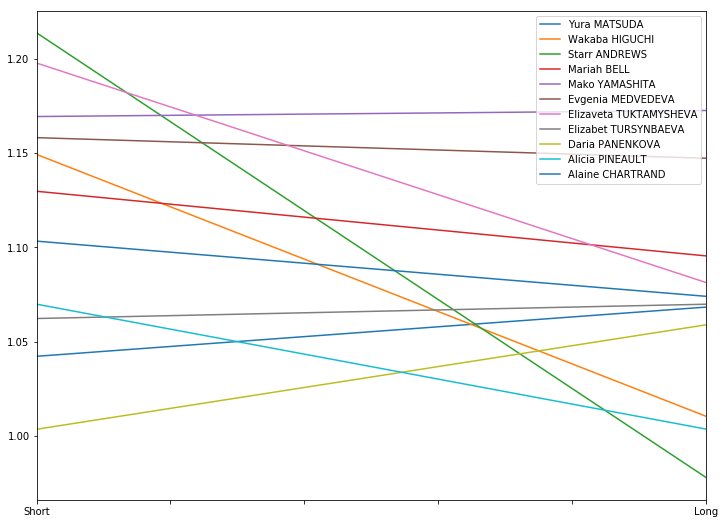

In [64]:
df = pd.DataFrame(data=overbase.T,columns=names,index=["Short","Long"])
df.plot()
pl.show()